## FEATURE ENGINEERING

### Домашняя работа 3

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [53]:
data = pd.read_csv('aac_shelter_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


#### 1. Проверка наличия пропусков.

In [54]:
data.isna().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [55]:
#data[data['animal_id'] == 'A701901']

#### 2. Столбец 'animal_type'

Проанализируем типы животных в датасете.

In [56]:
print(data.animal_type.value_counts())

print('\nДоля собак и кошек:', data.loc[ data['animal_type'].isin(['Dog', 'Cat'])].count().animal_type / 
      data.animal_type.count())

print('Доля остальных животных:', data.loc[ data['animal_type'].isin(['Other', 'Bird', 'Livestock'])].count().animal_type / 
      data.animal_type.count())

Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

Доля собак и кошек: 0.9413207932938049
Доля остальных животных: 0.05867920670619505


Проверим, входят ли собаки и кошки в группу 'Other' столбца 'animal_type'. Если да, то скорректируем тип животного. 

In [57]:
other_animals = data.loc[ data['animal_type'].isin(['Other'])]
other_animals.breed.unique()

array(['Bat Mix', 'Squirrel Mix', 'Bat', 'Raccoon Mix', 'Armadillo Mix',
       'Rat', 'Hamster Mix', 'Raccoon', 'Rabbit Sh Mix', 'Fox Mix',
       'American Sable', 'Opossum Mix', 'Guinea Pig Mix', 'Rex Mix',
       'Rat Mix', 'Rabbit Sh', 'Skunk', 'Tortoise Mix', 'Skunk Mix',
       'Californian Mix', 'Lionhead Mix', 'Opossum', 'Cold Water',
       'Squirrel', 'Guinea Pig', 'Ferret Mix', 'Ferret', 'Rabbit Lh Mix',
       'New Zealand Wht Mix', 'Coyote Mix', 'Lop-Mini Mix', 'Fox',
       'Cottontail Mix', 'Jersey Wooly Mix', 'Turtle Mix', 'American Mix',
       'Lizard Mix', 'Dutch/Rabbit Sh', 'English Spot Mix', 'Armadillo',
       'Lop-Holland Mix', 'Rabbit Sh/Lop-Mini', 'Hamster', 'Lionhead',
       'Dutch Mix', 'Californian', 'Silver Mix', 'Lop-English Mix',
       'Sugar Glider', 'Snake', 'Snake Mix', 'Hotot Mix', 'Rabbit Lh',
       'Mouse Mix', 'Chinchilla-Stnd Mix', 'Checkered Giant Mix',
       'Coyote', 'Netherlnd Dwarf Mix', 'Havana Mix', 'Lop-Mini',
       'Otter Mix', 'Bo

Анализ показал, что в группу  'Other' столбца 'animal_type' собаки и кошки не входят. 

Поскольку тип остальных животных и отношение человека к ним как к домашним сильно отличаются от кошек и собак, это может привести к неточности прогнозирования. Принимая во внимание доля прочих животных (около 6%), примем решение из датасета выделить два: 1-й: кошки и собаки, 2-й: все остальные.

In [58]:
# Создание датасета только из кошек и собак
data = data.loc[ data['animal_type'].isin(['Dog', 'Cat'])]

# Создание датасета только из кошек и собак
data_other = data.loc[ data['animal_type'].isin(['Other', 'Bird', 'Livestock'])]

data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male


## Анализ датасета только с собаками и кошками

### 1. Столбец 'age_upon_outcome'.

Переведем возраст всех животных в годы. Для этого сначала необходимо извлечь из столбца 'age_upon_outcome' следующие данные: значение возраста и единицы измерения возраста.

In [59]:
# Разделение столбца 'age_upon_outcome' на два столбца 'age' и 'age_period'

data['age'] = data['age_upon_outcome'].str.split(' ').str[0].fillna(0).astype(int)
data['age_period'] = data['age_upon_outcome'].str.split(' ').str[1].fillna(0)

# Удаление столбца 'age_upon_outcome'
data.drop(['age_upon_outcome'], axis=1, inplace=True)

data.head(5)

,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age,age_period
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,weeks
1,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,year
2,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,year
3,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,years
5,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,months


In [60]:
# Уникальные значения столбца 'age_period'
data['age_period'].unique()

array(['weeks', 'year', 'years', 'months', 'month', 'days', 'week', 'day',
       0], dtype=object)

In [61]:
# Перевод возраста всех животных в годы 
def ages(period):
    '''Перевод овзраста животных в годы.'''        
    if period['age_period'] == 'year' or period['age_period'] == 'years':
        return period['age']
    
    if period['age_period'] == 'month' or period['age_period'] == 'months':
        return period['age'] / 12 
    
    if period['age_period'] == 'week' or period['age_period'] == 'weeks':
        return period['age'] / 52
    
    if period['age_period'] == 'day' or period['age_period'] == 'days':
        return period['age'] / 365

data['age_outcome_years_1'] = data.apply(ages, axis=1)

# Удаление столбцов 'age' и 'age_period'
data.drop(['age', 'age_period' ], axis=1, inplace=True)

data.head(5)

,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_outcome_years_1
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,0.038462
1,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.000000
2,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.000000
3,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.000000
5,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,0.333333


Проверим, чтобы возраст всех животных был больше 0.

In [62]:
# Количество и доля животных, возраст которых меньше 0
print('Количество животных с возрастом меньше нуля:', data.query('age_outcome_years_1 < 0')['age_outcome_years_1'].count())
print('Доля животных с возрастом меньше нуля:', data.query('age_outcome_years_1 < 0')['age_outcome_years_1'].count() / data['age_outcome_years_1'].count())


Количество животных с возрастом меньше нуля: 0
Доля животных с возрастом меньше нуля: 0.0


В результате получили столбец с возрастом животных в годах, при этом все значения больше 0.

#### 3. Столбцы 'date_of_birth', 'datetime' и 'monthyear'

In [63]:
# Преобразование метки времени в дату и время
data.loc[:, 'date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data.loc[:, 'datetime'] = pd.to_datetime(data['datetime'])
data.loc[:, 'monthyear'] = pd.to_datetime(data['monthyear'])

# Проверка идентичности столбцов 'datetime' и 'monthyear'
(data['datetime'] - data['monthyear']).unique()

array([0], dtype='timedelta64[ns]')

Поскольку столбцы 'datetime' и 'monthyear' одинаковые, то один из них можно удалить.

In [64]:
# Удаление столбца 'monthyear'
data.drop(['monthyear'], axis=1, inplace=True)

Определим возраст животных на момент покидания приюта, используя столбцы 'date_of_birth' и 'datetime'.

In [65]:
# Возраст животных в годах на момент покидания приюта
data['age_outcome_years_2'] = ((data['datetime'] - data['date_of_birth']))/ np.timedelta64(1, 'Y')
data.head(5)

,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age_outcome_years_1,age_outcome_years_2
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,0.038462,0.042901
1,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,1.000000,1.003418
2,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.000000,1.176197
3,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,9.000000,9.036899
5,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07 13:06:00,*Edgar,Partner,Transfer,Intact Male,0.333333,0.346471


Проверим, чтобы возраст всех животных был больше 0.

In [66]:
# Количество и доля животных, возраст которых меньше 0
print('Количество животных с возрастом меньше нуля:', data.query('age_outcome_years_2 < 0')['age_outcome_years_2'].count())
print('Доля животных с возрастом меньше нуля:', data.query('age_outcome_years_2 < 0')['age_outcome_years_2'].count() / data['age_outcome_years_2'].count())


Количество животных с возрастом меньше нуля: 8
Доля животных с возрастом меньше нуля: 0.00010860121633362293


В результате получили 8 животных с возрастом меньше 0 по столбцу 'age_outcome_years_2'.

Столбцы 'age_outcome_years_1' и 'age_outcome_years_2' содержат в себе аналогичную информацию - возраст животного на момент покидания приюта. Поэтому для дальнейшего анализа нужно оставить только один из этих двух признаков. 
Сравним значения двух полученных столбцов: 'age_outcome_years_1' и 'age_outcome_years_2'.

In [67]:
# Сравнение значений столбцов 'age_outcome_years_1' и 'age_outcome_years_2'
df = pd.DataFrame({'type':['age_outcome_years_1', 'age_outcome_years_2'], 
      'nan_count':[data.isna().sum().age_outcome_years_1, data.isna().sum().age_outcome_years_2], 
      'negative_age_count':[data.query('age_outcome_years_1 < 0')['age_outcome_years_1'].count(), data.query('age_outcome_years_2 < 0')['age_outcome_years_2'].count()]})

df

,type,nan_count,negative_age_count
0,age_outcome_years_1,6,0
1,age_outcome_years_2,0,8


Как видно, в каждом столбце по 6 и 8 некорректных значений. При этом столбец 'age_outcome_years_2' содержит в себе более точные данные, поскольку рассчитывался с точностью до дня. 

Принимаем решение оставить столбец 'age_outcome_years_2', предварительно очистив его от отрицательного возраста (количество данных значений незначительно - менее < 1%)  . Столбец 'age_outcome_years_1' удаляем.

In [68]:
# Удаление отрицательного возраста из 'age_outcome_years_2'
data = data.query('age_outcome_years_2 >= 0')

# Удаление столбца 'age_outcome_years_1'
data.drop(['age_outcome_years_1'], axis=1, inplace=True)

data.head(5)

,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age_outcome_years_2
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,0.042901
1,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,1.003418
2,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.176197
3,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,9.036899
5,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07 13:06:00,*Edgar,Partner,Transfer,Intact Male,0.346471


#### 4. Столбец 'animal_id'.

#### 5. Столбцы 'color' и 'name'.

Исходя из допущения, что окрас животного и его кличка не влияют на значения столбца 'outcome_type', удалим данные признаки из датасета -  'color' и 'name'.

In [69]:
# Удаление столбцов 'color' и 'name'
data.drop(['color', 'name'], axis=1, inplace=True)
data.head(5)

,animal_id,animal_type,breed,date_of_birth,datetime,outcome_subtype,outcome_type,sex_upon_outcome,age_outcome_years_2
0,A684346,Cat,Domestic Shorthair Mix,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,Intact Male,0.042901
1,A666430,Dog,Beagle Mix,2012-11-06,2013-11-07 11:47:00,Partner,Transfer,Spayed Female,1.003418
2,A675708,Dog,Pit Bull,2013-03-31,2014-06-03 14:20:00,NaN,Adoption,Neutered Male,1.176197
3,A680386,Dog,Miniature Schnauzer Mix,2005-06-02,2014-06-15 15:50:00,Partner,Transfer,Neutered Male,9.036899
5,A664462,Dog,Leonberger Mix,2013-06-03,2013-10-07 13:06:00,Partner,Transfer,Intact Male,0.346471


#### 6. Столбец 'sex_upon_outcome'.

In [70]:
data['sex_upon_outcome'].value_counts()

Neutered Male    27690
Spayed Female    25117
Intact Male       9182
Intact Female     8902
Unknown           2763
Name: sex_upon_outcome, dtype: int64

Столбец 'sex_upon_outcome' обозначает пол животного, а также, было ли оно стерилизовано на момент покидания приюта. Этот параметр можно разделить на два новых: пол и Spay / Neuter.

In [71]:
# Выделение пола животного
data.loc[ data['sex_upon_outcome'].isin(['Intact Male', 'Neutered Male']), 'sex_type' ] = 'male'
data.loc[ data['sex_upon_outcome'].isin(['Spayed Female', 'Intact Female']), 'sex_type' ] = 'female'
data.head(5)

,animal_id,animal_type,breed,date_of_birth,datetime,outcome_subtype,outcome_type,sex_upon_outcome,age_outcome_years_2,sex_type
0,A684346,Cat,Domestic Shorthair Mix,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,Intact Male,0.042901,male
1,A666430,Dog,Beagle Mix,2012-11-06,2013-11-07 11:47:00,Partner,Transfer,Spayed Female,1.003418,female
2,A675708,Dog,Pit Bull,2013-03-31,2014-06-03 14:20:00,NaN,Adoption,Neutered Male,1.176197,male
3,A680386,Dog,Miniature Schnauzer Mix,2005-06-02,2014-06-15 15:50:00,Partner,Transfer,Neutered Male,9.036899,male
5,A664462,Dog,Leonberger Mix,2013-06-03,2013-10-07 13:06:00,Partner,Transfer,Intact Male,0.346471,male


In [72]:
print(f'Пол неопределен: {data.sex_type.isna().sum()} животных или {round(100 * data.sex_type.isna().sum() / data.sex_type.count(), 1)}%')

Пол неопределен: 2765 животных или 3.9%


In [73]:
# Определение Spay / Neuter животного
data.loc[ data['sex_upon_outcome'].isin(['Intact Female', 'Intact Male']), 'spay/neuter' ] = 'no'
data.loc[ data['sex_upon_outcome'].isin(['Spayed Female', 'Neutered Male']), 'spay/neuter' ] = 'yes'

# Удаление столбца 'sex_upon_outcome'
data.drop(['sex_upon_outcome'], axis=1, inplace=True)
data.head()


,animal_id,animal_type,breed,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter
0,A684346,Cat,Domestic Shorthair Mix,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,male,no
1,A666430,Dog,Beagle Mix,2012-11-06,2013-11-07 11:47:00,Partner,Transfer,1.003418,female,yes
2,A675708,Dog,Pit Bull,2013-03-31,2014-06-03 14:20:00,NaN,Adoption,1.176197,male,yes
3,A680386,Dog,Miniature Schnauzer Mix,2005-06-02,2014-06-15 15:50:00,Partner,Transfer,9.036899,male,yes
5,A664462,Dog,Leonberger Mix,2013-06-03,2013-10-07 13:06:00,Partner,Transfer,0.346471,male,no


## Кошки

In [74]:
cat = data.loc[ data['animal_type'].isin(['Cat'])]
cat.breed.value_counts()

Domestic Shorthair Mix                   23330
Domestic Medium Hair Mix                  2323
Domestic Longhair Mix                     1228
Siamese Mix                                998
Domestic Shorthair                         386
                                         ...  
Domestic Medium Hair/Manx                    1
Domestic Shorthair/Domestic Shorthair        1
Angora/Persian                               1
Domestic Shorthair/Abyssinian                1
Domestic Longhair/Russian Blue               1
Name: breed, Length: 79, dtype: int64

Анализ показал, что домашняя порода является наиболее распространенной. 

Поскольку слово 'Mix' встречается в большенстве названий пород, то предположим, что этот термин не относится к типу пород и, удалим его из названия пород.

In [75]:
cat['breed'] = cat['breed'].str.lower().str.replace('mix', '').str.replace('medium hair', 'mediumhair').str.strip()
cat.tail(50)
cat.breed.unique()


C:\Users1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['domestic shorthair', 'domestic mediumhair', 'siamese',
       'russian blue', 'domestic longhair', 'manx', 'ragdoll',
       'snowshoe/domestic shorthair', 'snowshoe', 'angora', 'himalayan',
       'domestic longhair/persian', 'japanese bobtail',
       'domestic longhair/rex', 'siamese/domestic shorthair',
       'domestic mediumhair/siamese', 'maine coon', 'devon rex',
       'balinese', 'american shorthair', 'british shorthair',
       'angora/persian', 'munchkin shorthair',
       'domestic shorthair/siamese', 'manx/domestic longhair', 'persian',
       'cymric', 'tonkinese', 'siamese/angora', 'burmese', 'sphynx',
       'domestic shorthair/domestic mediumhair', 'bengal',
       'domestic longhair/russian blue', 'bombay', 'exotic shorthair',
       'domestic shorthair/british shorthair', 'abyssinian',
       'manx/domestic shorthair', 'norwegian forest cat',
       'snowshoe/ragdoll', 'manx/siamese', 'turkish van', 'cornish rex',
       'birman', 'american curl shorthair', 

Ассоциация любителей кошек (CFA) в настоящее время признает 42 породы кошек. Поэтому создадим два новых признака, которые отличают кошку от породы, признанной CFA, или домашней породы. А далее проанализируем, влияет ли порода кошек на итоговый результат работы.

Создадим список всех пород CFA, а затем преобразуем этот список в нижний регистр и соединяем все элементы с панелью.

In [76]:
# Список всех пород кошек
cfa_breeds = ['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Wirehair', 
              'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Burmilla', 
              'Chartreux', 'Colorpoint Shorthair', 'Cornish Rex', 'Devon Rex', 'Egyptian Mau', 'European Burmese', 
              'Exotic', 'Havana Brown', 'Japanese Bobtail', 'Korat', 'LaPerm', 'Maine Coon', 'Manx', 
              'Norwegian Forest Cat', 'Ocicat', 'Oriental', 'Persian', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 
              'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Singapura', 'Somali', 'Tonkinese', 
              'Turkish Angora', 'Turkish Van']


cfa_breeds = [i.lower() for i in cfa_breeds]
cfa_breeds = '|'.join(cfa_breeds)
cfa_breeds

'abyssinian|american bobtail|american curl|american shorthair|american wirehair|balinese|bengal|birman|bombay|british shorthair|burmese|burmilla|chartreux|colorpoint shorthair|cornish rex|devon rex|egyptian mau|european burmese|exotic|havana brown|japanese bobtail|korat|laperm|maine coon|manx|norwegian forest cat|ocicat|oriental|persian|ragamuffin|ragdoll|russian blue|scottish fold|selkirk rex|siamese|siberian|singapura|somali|tonkinese|turkish angora|turkish van'

In [77]:
cat['breed'].str.split('/', expand=True).rename(columns={0:'breed1', 1:'breed2'})

cat = pd.concat([cat, 
                     cat['breed'].str.split('/', expand=True).rename(columns={0:'breed1', 1:'breed2'})], 
                    axis=1)

cat['cfa_breed'] = np.where((cat['breed1'].str.contains(cfa_breeds)) | 
                                (cat['breed2'].str.contains(cfa_breeds)), 
                                True, False)

cat['breeds'] = np.where((cat['breed1'].str.contains(cfa_breeds) == False) | 
                                     (cat['breed2'].str.contains(cfa_breeds) == False), 
                                     'no', 'yes')


# Удаление столбов 'breed', 'breed1', 'breed2' и 'cfa_breed'
cat.drop(['breed', 'breed1', 'breed2', 'cfa_breed'], axis=1, inplace=True)
cat.head()

cat.head(5)

,animal_id,animal_type,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter,breeds
0,A684346,Cat,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,male,no,no
8,A685067,Cat,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,female,no,no
9,A678580,Cat,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,female,yes,no
10,A675405,Cat,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,female,yes,no
17,A670420,Cat,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,male,no,no


In [78]:
cat.breeds.count()

29417

## СОБАКИ

Проанализируем породы собак в датасете. 

In [79]:
# Список пород собак
dog = data.loc[ data['animal_type'].isin(['Dog'])]
list(dog.breed.unique())

['Beagle Mix',
 'Pit Bull',
 'Miniature Schnauzer Mix',
 'Leonberger Mix',
 'Chihuahua Shorthair Mix',
 'Papillon/Border Collie',
 'Chihuahua Shorthair/Pomeranian',
 'Miniature Schnauzer/Miniature Poodle',
 'Labrador Retriever Mix',
 'Rat Terrier Mix',
 'Pit Bull Mix',
 'German Shepherd/Labrador Retriever',
 'Mastiff Mix',
 'Plott Hound Mix',
 'Miniature Pinscher Mix',
 'Cardigan Welsh Corgi/English Setter',
 'Border Collie Mix',
 'Boxer Mix',
 'Parson Russell Terrier Mix',
 'Miniature Poodle Mix',
 'Australian Shepherd/Australian Cattle Dog',
 'Basenji/Chihuahua Longhair',
 'Labrador Retriever',
 'Siberian Husky/German Shepherd',
 'German Shepherd/Boxer',
 'Labrador Retriever/German Shepherd',
 'German Shepherd/Chow Chow',
 'Pit Bull/Labrador Retriever',
 'Yorkshire Terrier Mix',
 'Beagle/Chihuahua Longhair',
 'Parson Russell Terrier/Chihuahua Shorthair',
 'German Shepherd Mix',
 'Staffordshire',
 'Catahoula/Labrador Retriever',
 'Shih Tzu Mix',
 'Dachshund Mix',
 'American Bulldog Mi

Поскольку из предоставленного датасета точно не известно, какие собаки породистые, а какие помесь, то будем исходить из допущения, что значение столбца 'beed', в котором встречаются две породы, разделенные '/', относится к непородистым собакам.  

Создадим новый признак 'dog_breed', который отличает собаку как породистую и как помесь разных пород.

In [80]:
# Новый признак 'dog_breed': значение 'no', если собака не породистая
dog.loc[ dog['breed'].str.contains('/'), 'dog_breed' ] = 'no'

C:\Users1\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users1\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Поскольку изначально в столбце 'breed' не было пустых значений, то ячейки со значением Nan будут соответствовать породистым собакам.

In [81]:
# Заполнение ячеек Nan столбца 'dog_breed'
dog['dog_breed'].fillna('yes', inplace=True)
dog.head(5)

# dog['dog_breed'] = np.where((dog['breed'].str.contains('/')), 'yes', 'no') - альтернатива предыдущих двух команд


# Удаление столбца 'breed'
dog.drop(['breed'], axis=1, inplace=True)
dog.head()

# Переименование столбца 'dog_breed' в 'breed' 
dog.rename(columns={'dog_breed': 'breeds'}, inplace=True)
dog.head()

C:\Users1\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users1\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users1\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,animal_id,animal_type,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter,breeds
1,A666430,Dog,2012-11-06,2013-11-07 11:47:00,Partner,Transfer,1.003418,female,yes,yes
2,A675708,Dog,2013-03-31,2014-06-03 14:20:00,NaN,Adoption,1.176197,male,yes,yes
3,A680386,Dog,2005-06-02,2014-06-15 15:50:00,Partner,Transfer,9.036899,male,yes,yes
5,A664462,Dog,2013-06-03,2013-10-07 13:06:00,Partner,Transfer,0.346471,male,no,yes
7,A692618,Dog,2011-11-23,2014-12-08 15:55:00,Partner,Transfer,3.043630,female,yes,yes


In [82]:
# Объединение датафреймов cat и dog
data_dc = cat.append(dog, ignore_index=True)
data_dc

,animal_id,animal_type,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter,breeds
0,A684346,Cat,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,male,no,no
1,A685067,Cat,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,female,no,no
2,A678580,Cat,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,female,yes,no
3,A675405,Cat,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,female,yes,no
4,A670420,Cat,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,male,no,no
...,...,...,...,...,...,...,...,...,...,...
73651,A764895,Dog,2017-12-04,2018-02-01 18:40:00,Foster,Adoption,0.163666,male,yes,no
73652,A764894,Dog,2017-12-04,2018-02-01 18:26:00,Foster,Adoption,0.163639,female,yes,no
73653,A764468,Dog,2014-12-30,2018-02-01 18:06:00,NaN,Adoption,3.093162,male,yes,yes
73654,A765858,Dog,2017-11-13,2018-02-01 18:32:00,NaN,Adoption,0.221147,female,yes,yes


In [83]:
# Удаление столбца 'animal_id'
data_dc.drop(['animal_id'], axis=1, inplace=True)
data_dc.head(10)

# data_dc.animal_id.value_counts() М.б. сделать 2 группы: 1)один раз попадали в приют; 2) более одного раза попадали в приют

,animal_type,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter,breeds
0,Cat,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,male,no,no
1,Cat,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,female,no,no
2,Cat,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,female,yes,no
3,Cat,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,female,yes,no
4,Cat,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,male,no,no
5,Cat,2014-06-02,2014-08-13 15:04:00,NaN,Adoption,0.198848,female,yes,no
6,Cat,2013-07-05,2014-03-06 14:29:00,SCRP,Transfer,0.669702,NaN,NaN,no
7,Cat,2014-03-22,2014-08-31 15:45:00,NaN,Adoption,0.445338,male,yes,no
8,Cat,2014-08-03,2014-10-31 18:29:00,Foster,Adoption,0.245782,male,yes,no
9,Cat,2012-12-04,2013-12-16 13:59:00,Partner,Transfer,1.033786,male,yes,no


### Применение OneHotEncoder

Применим OneHotEncoder для столбцов 'animal_type', 'sex_type', 'spay/neuter' и 'breeds'. Вначале уточним наличие пустых ячеек у этих показателей.

In [84]:
print(data_dc.isna().sum())

animal_type                0
date_of_birth              0
datetime                   0
outcome_subtype        41443
outcome_type               7
age_outcome_years_2        0
sex_type                2765
spay/neuter             2765
breeds                     0
dtype: int64


Поскольку пустые ячейки в категории 'animal_type' отсутствуют, то можно сразу применять OneHotEncoder. 

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [86]:
# Применение LabelEncoder
# label_enc = LabelEncoder()
# animal_type_label = label_enc.fit_transform(data_dc['animal_type'])
# data_dc.loc[:, 'animal_type_label'] = animal_type_label
# data_dc.tail(5)

# Применение OneHotEncoder для столбца 'animal_type'
ohe_enc = OneHotEncoder()
animal_type_ohe = ohe_enc.fit_transform(data_dc[['animal_type']]).toarray()
animal_type_columns = ohe_enc.categories_[0]
animal_type_df = pd.DataFrame(animal_type_ohe, columns=animal_type_columns)
print(animal_type_df.head())

# Объединение в одну таблицу 'data_dc' и 'animal_type'
data_dc = pd.concat([data_dc,  animal_type_df], axis=1)

# Удаление столбца 'animal_type'
data_dc.drop(['animal_type'], axis=1, inplace=True)

data_dc.head(10)

   Cat  Dog
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0


,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter,breeds,Cat,Dog
0,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,male,no,no,1.0,0.0
1,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,female,no,no,1.0,0.0
2,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,female,yes,no,1.0,0.0
3,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,female,yes,no,1.0,0.0
4,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,male,no,no,1.0,0.0
5,2014-06-02,2014-08-13 15:04:00,NaN,Adoption,0.198848,female,yes,no,1.0,0.0
6,2013-07-05,2014-03-06 14:29:00,SCRP,Transfer,0.669702,NaN,NaN,no,1.0,0.0
7,2014-03-22,2014-08-31 15:45:00,NaN,Adoption,0.445338,male,yes,no,1.0,0.0
8,2014-08-03,2014-10-31 18:29:00,Foster,Adoption,0.245782,male,yes,no,1.0,0.0
9,2012-12-04,2013-12-16 13:59:00,Partner,Transfer,1.033786,male,yes,no,1.0,0.0


In [87]:
print('Доля пустых ячеек в категориях "sex_type" и "spay/neuter": ',  data_dc.sex_type.isna().sum() / data_dc.sex_type.count())

Доля пустых ячеек в категориях "sex_type" и "spay/neuter":  0.039003540646908634


Поскольку в категорях 'sex_type' и 'spay/neuter', к которым хотим применить OneHotEncoder, есть пустые ячейки, то необходимо провести преобразование датасета и избавиться от них.

Для этого можно, например, в пустых ячейках указать новое значение - 'пол неопределен', тогда  в OneHotEncoder добавиться дополнительный признак. Другой вариант - удалить строки, содержащие пустые ячейки, поскольку их доля в общем объеме датасета составляет менее 5%.  

Выберем вариант с удалением пустых ячеек.

In [88]:
# Удаление пустых значений в столбце 'sex_type'
data_dc.dropna(subset=['sex_type'], inplace=True)
data_dc.isna().sum()

date_of_birth              0
datetime                   0
outcome_subtype        41357
outcome_type               6
age_outcome_years_2        0
sex_type                   0
spay/neuter                0
breeds                     0
Cat                        0
Dog                        0
dtype: int64

In [89]:
# Восстановление индексов попорядку после удаления строк
data_dc.reset_index(inplace=True)
data_dc.head(10)

,index,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,sex_type,spay/neuter,breeds,Cat,Dog
0,0,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,male,no,no,1.0,0.0
1,1,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,female,no,no,1.0,0.0
2,2,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,female,yes,no,1.0,0.0
3,3,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,female,yes,no,1.0,0.0
4,4,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,male,no,no,1.0,0.0
5,5,2014-06-02,2014-08-13 15:04:00,NaN,Adoption,0.198848,female,yes,no,1.0,0.0
6,7,2014-03-22,2014-08-31 15:45:00,NaN,Adoption,0.445338,male,yes,no,1.0,0.0
7,8,2014-08-03,2014-10-31 18:29:00,Foster,Adoption,0.245782,male,yes,no,1.0,0.0
8,9,2012-12-04,2013-12-16 13:59:00,Partner,Transfer,1.033786,male,yes,no,1.0,0.0
9,10,2014-04-27,2014-07-03 12:12:00,Partner,Transfer,0.184832,female,no,yes,1.0,0.0


In [90]:
# Применение OneHotEncoder для столбца 'sex_type'
ohe_enc = OneHotEncoder()
sex_type_ohe = ohe_enc.fit_transform(data_dc[['sex_type']]).toarray()
sex_type_columns = ohe_enc.categories_[0]
sex_type_df = pd.DataFrame(sex_type_ohe, columns=sex_type_columns)
print(sex_type_df.head())

# Объединение в одну таблицу 'data_dc' и 'sex_type_df'
data_dc = pd.concat([data_dc,  sex_type_df], axis=1)

# Удаление столбца 'sex_type'
data_dc.drop(['sex_type'], axis=1, inplace=True)

data_dc.head(10)

   female  male
0     0.0   1.0
1     1.0   0.0
2     1.0   0.0
3     1.0   0.0
4     0.0   1.0


,index,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,spay/neuter,breeds,Cat,Dog,female,male
0,0,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,no,no,1.0,0.0,0.0,1.0
1,1,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,no,no,1.0,0.0,1.0,0.0
2,2,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,yes,no,1.0,0.0,1.0,0.0
3,3,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,yes,no,1.0,0.0,1.0,0.0
4,4,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,no,no,1.0,0.0,0.0,1.0
5,5,2014-06-02,2014-08-13 15:04:00,NaN,Adoption,0.198848,yes,no,1.0,0.0,1.0,0.0
6,7,2014-03-22,2014-08-31 15:45:00,NaN,Adoption,0.445338,yes,no,1.0,0.0,0.0,1.0
7,8,2014-08-03,2014-10-31 18:29:00,Foster,Adoption,0.245782,yes,no,1.0,0.0,0.0,1.0
8,9,2012-12-04,2013-12-16 13:59:00,Partner,Transfer,1.033786,yes,no,1.0,0.0,0.0,1.0
9,10,2014-04-27,2014-07-03 12:12:00,Partner,Transfer,0.184832,no,yes,1.0,0.0,1.0,0.0


In [91]:
# Применение OneHotEncoder для столбца 'spay/neuter'
ohe_enc = OneHotEncoder()
spay_neuter_ohe = ohe_enc.fit_transform(data_dc[['spay/neuter']]).toarray()
spay_neuter_columns = ['neuter_no', 'neuter_yes']
spay_neuter_df = pd.DataFrame(spay_neuter_ohe, columns=spay_neuter_columns)
print(spay_neuter_df.head(5))

# Объединение в одну таблицу 'data_dc' и 'spay/neuter_df'
data_dc = pd.concat([data_dc,  spay_neuter_df], axis=1)

# Удаление столбца 'spay/neuter'
data_dc.drop(['spay/neuter'], axis=1, inplace=True)
data_dc.head()

   neuter_no  neuter_yes
0        1.0         0.0
1        1.0         0.0
2        0.0         1.0
3        0.0         1.0
4        1.0         0.0


,index,date_of_birth,datetime,outcome_subtype,outcome_type,age_outcome_years_2,breeds,Cat,Dog,female,male,neuter_no,neuter_yes
0,0,2014-07-07,2014-07-22 16:04:00,Partner,Transfer,0.042901,no,1.0,0.0,0.0,1.0,1.0,0.0
1,1,2014-06-16,2014-08-14 18:45:00,NaN,Adoption,0.163676,no,1.0,0.0,1.0,0.0,1.0,0.0
2,2,2014-03-26,2014-06-29 17:45:00,Offsite,Adoption,0.262126,no,1.0,0.0,1.0,0.0,0.0,1.0
3,3,2013-03-27,2014-03-28 14:55:00,NaN,Return to Owner,1.003776,no,1.0,0.0,1.0,0.0,0.0,1.0
4,4,2013-12-16,2014-01-09 19:29:00,Partner,Transfer,0.067932,no,1.0,0.0,0.0,1.0,1.0,0.0


In [92]:
# Применение OneHotEncoder для столбца 'breeds'
ohe_enc = OneHotEncoder()
breeds_ohe = ohe_enc.fit_transform(data_dc[['breeds']]).toarray()
breeds_columns = ['breeds_no', 'breeds_yes'] 
breeds_df = pd.DataFrame(breeds_ohe, columns=breeds_columns)
print(breeds_df.head(5))

# Объединение в одну таблицу data_dc и breeds_df
data_dc = pd.concat([data_dc,  breeds_df], axis=1)

# Удаление столбцов 'breeds', 'index', 'date_of_birth', 'datetime' и 'outcome_subtype'
data_dc.drop(['breeds', 'index', 'date_of_birth', 'datetime', 'outcome_subtype'], axis=1, inplace=True)
data_dc.head()

   breeds_no  breeds_yes
0        1.0         0.0
1        1.0         0.0
2        1.0         0.0
3        1.0         0.0
4        1.0         0.0


,outcome_type,age_outcome_years_2,Cat,Dog,female,male,neuter_no,neuter_yes,breeds_no,breeds_yes
0,Transfer,0.042901,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,Adoption,0.163676,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Adoption,0.262126,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Return to Owner,1.003776,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,Transfer,0.067932,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Удалим пустые значения в столбце 'outcome_type'.

In [94]:
# Удаление пустых значений в столбце 'outcome_type'
data_dc.dropna(inplace=True)
data_dc.isna().sum()

outcome_type           0
age_outcome_years_2    0
Cat                    0
Dog                    0
female                 0
male                   0
neuter_no              0
neuter_yes             0
breeds_no              0
breeds_yes             0
dtype: int64

#### Далее попробуем предсказать метки 'Adoption' и 'Transfer' (столбец 'outcome_type').

In [95]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()

In [96]:
X = data_dc.drop(['outcome_type'], axis=1)
y = data_dc['outcome_type']

Разделим выборку на две части: тренировочную и тестовую

In [98]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

In [99]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [104]:
# X_train.shape, X_test.shape

In [105]:
# y_train.shape, y_test.shape

In [103]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model=RandomForestClassifier(n_estimators=100)

In [111]:
# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

                 precision    recall  f1-score   support

       Adoption       0.71      0.73      0.72      8087
           Died       0.15      0.11      0.12       119
       Disposal       0.00      0.00      0.00         3
     Euthanasia       0.21      0.21      0.21       653
        Missing       0.00      0.00      0.00        14
Return to Owner       0.50      0.49      0.49      3578
      Rto-Adopt       0.00      0.00      0.00        44
       Transfer       0.62      0.61      0.61      5224

       accuracy                           0.62     17722
      macro avg       0.27      0.27      0.27     17722
   weighted avg       0.62      0.62      0.62     17722



0.6187789188579167

No handles with labels found to put in legend.


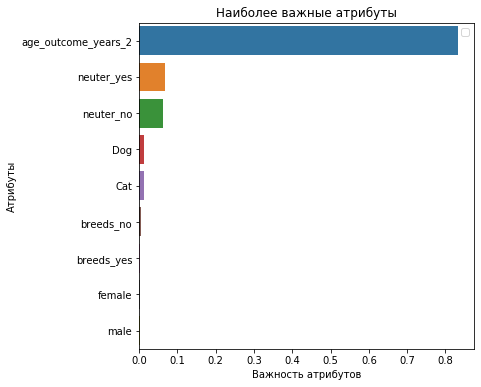

In [118]:
# Наиболее важные атрибуты для модели Random Forest
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [119]:
# 1. age_upon_outcome - возрст животного на момент попадания в приют
# 2. animal_id - не все уникальные, количество повторов достигает 11
# 3. breed - порода
# 4. datetime и monthyear - дата и время поступления
# 5. sex_upon_outcome - пол животного и, если оно было стерилизовано или стерилизовано.

# 6. sex_upon_outcome - разделить на два признака: пол и стерил/нестерил
# 7. разделить на две категории: порода - непорода
# 8. возраст - в неудобном для анализа формате. нужно преобразовать